In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [2]:
import os
print(os.listdir('.'))

['.ipynb_checkpoints', 'T0041ALL.CSV', 'T0042ALL.CSV', 'T0043ALL.CSV', 'T0044ALL.CSV', 'T0045ALL.CSV', 'T0046ALL.CSV', 'Untitled.ipynb']


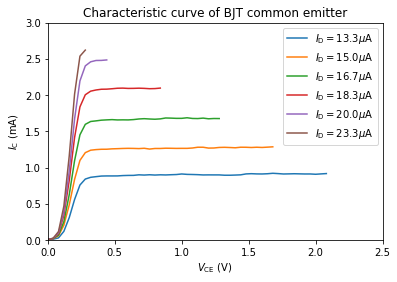

In [59]:
rc = 1000
filelist = ['T0041ALL.CSV', 'T0042ALL.CSV', 'T0043ALL.CSV', 'T0044ALL.CSV', 'T0045ALL.CSV', 'T0046ALL.CSV']
iclabel = list(map(str, [13.3, 15.0, 16.7, 18.3, 20.0, 23.3]))
for filename, label in zip(filelist, iclabel):
    arr_vcc = []
    arr_vce = []
    arr_ic = []
    
    with open(filename, 'r') as f:
        for _ in range(16):
            f.readline()
        while True:
            try:
                _, vcc, _, _, _, vce, _, _, _, mat = f.readline().strip().split(',')
                vcc, vce, mat = map(float, [vcc, vce, mat])
                ic = mat / rc
                arr_vce.append(vce); arr_ic.append(ic)
            except:
                break
    
    temp = zip(arr_vce, arr_ic)
    temp = list(temp)
    G = {}
    for x, y in temp:
        try:
            G[x].append(y)
        except:
            G[x] = []
            G[x].append(y)

    x = []
    y = []
    for key, value in G.items():
        x.append(key)
        y.append(np.average(value))

    temp = zip(x, y)
    temp = list(temp)
    temp.sort(key=lambda x: x[0])
    x, y = np.transpose(temp)
    x = np.array(x)
    y = np.array(y) * 1000
    plt.plot(x, y, label='$I_{\mathrm{D}} = %s\mu \mathrm{A}$' % (label))

plt.xlim(left=0, right=2.5)
plt.ylim(bottom=0, top=3)
plt.xlabel('$V_{\mathrm{CE}}$ (V)')
plt.ylabel('$I_{\mathrm{C}}$ (mA)')
plt.title('Characteristic curve of BJT common emitter')
plt.legend(loc=0)
plt.savefig('bjtce-result.pdf')